# Imports

In [1]:
%load_ext autoreload
%autoreload 2
from collections import defaultdict
import pickle
import numpy as np
import sys
sys.path.append("../..")
from utils.diverse import *
from utils.data_transformations import *
from utils.visualization_tools import *
from sklearn.utils import resample

In [2]:
import tensorflow as tf


In [11]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tensorflow.keras.layers import Lambda, Input, Dense, Conv2D
#from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
import tensorflow as tf

from keras.models import Sequential
from keras.layers import *
from keras import layers, models

In [3]:
from predictive_modeling.models.vae_cnn_v1 import *

Using TensorFlow backend.


In [18]:
x = Input(shape=(16,))
x = Dense(128, activation='relu')(x)

In [20]:
x = Reshape((1,128,1))(x)

In [58]:
x.shape

TensorShape([None, 1, 128, 1])

In [65]:
con1 = Conv2D(8, (1, 16), subsample=(1, 4), activation = "relu", padding="same")(x)

/home/elerator/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 16), activation="relu", padding="same", strides=(1, 4))`
  """Entry point for launching an IPython kernel.


In [105]:
shape = [-1,1,64, 1]

x = Dense(32, activation='relu')(keras.Input(shape=(2,)))
x = Dense(64, activation='relu')(x)
x = Reshape((shape[1], shape[2], shape[3]))(x)
x = Conv2D(10,(1,25), padding = "same")(x)
x = UpSampling2D((1, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [108]:
shape = [-1,16,32, 1]
x = Dense(512, activation = "relu")(keras.Input(shape=(2,)))
x = Reshape((shape[1], shape[2], shape[3]))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(1, (1, 1), activation='relu')(x)
#x = layers.UpSampling2D((2, 2))(x)
print(x.shape)

(None, 64, 128, 1)


In [104]:
decoded.shape

TensorShape([None, 1, 128, 1])

In [88]:
#linregress([1,2,3,1,3,3,4,5], [1,2,3,1,2,2,5,5])

In [79]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)

print(x.shape)
x = layers.UpSampling2D((2, 2))(x)
print(x.shape)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
print(x.shape)
x = layers.UpSampling2D((2, 2))(x)
print(x.shape)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
print(x.shape)
x = layers.UpSampling2D((2, 2))(x)
print(x.shape)
decoded = layers.Conv2D(1, (10, 10), activation='sigmoid', padding='same')(x)
print(decoded.shape)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

(None, 4, 4, 8)
(None, 8, 8, 8)
(None, 8, 8, 8)
(None, 16, 16, 8)
(None, 14, 14, 16)
(None, 28, 28, 16)
(None, 28, 28, 1)


In [55]:
con2 = Conv2D(64, (1, 8), subsample=(1, 8), activation = "relu", padding="same")(x)

/home/elerator/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 8), activation="relu", padding="same", strides=(1, 8))`
  """Entry point for launching an IPython kernel.


In [56]:
con2

<tf.Tensor 'conv2d_21/Relu:0' shape=(None, 1, 16, 64) dtype=float32>

In [42]:
con2 = Conv2D(1, (1, 25), subsample=(1, 1), activation = "relu")(con1)

/home/elerator/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (1, 25), activation="relu", strides=(1, 1))`
  """Entry point for launching an IPython kernel.


In [43]:
con2

<tf.Tensor 'conv2d_14/Relu:0' shape=(None, 1, 104, 1) dtype=float32>

# Load dataset

In [4]:
with open("../../../../main_experiment/sparse_data/dataset.pkl", "rb") as f:
    dataset = pickle.load(f)
slow_wave_ids = list(dataset["sws"].keys())
print(len(slow_wave_ids))

3030


In [5]:
dataset["sws"][slow_wave_ids[0]].keys()

dict_keys(['shape', 'hemo_aligned', 'gcamp_aligned', 'gcamp_interpolated', 'hemo_interpolated', 'correlation', 'width', 'height', 'start', 'stop', 'file_id', 'nc_start', 'nc_stop', 'left_too_high', 'iso', 'gcamp_mean_centered', 'flow_components', 'mean_sources', 'mean_sinks', 'gcamp_mean'])

# Load data for features, select slow waves

In [6]:
features = ["iso", "start", "stop", "width", "height", "gcamp_interpolated", "gcamp_mean", 
            "hemo_interpolated", "left_too_high", "correlation", "mean_sources", "mean_sinks"]
iso, start, stop, width, height, gcamp, gcamp_mean, hemo, left_too_high, corr, mean_sources, mean_sinks = slow_wave_features(dataset, features)

#Filter waves and get all data for filtered indices (where)
where = corr < .3
where[height/width < 0.1] = False
where[left_too_high] = False
#where[height/width < 0.05] = False

print(np.sum(where))
    
iso, start, stop, width, height, gcamp, gcamp_mean, hemo, left_too_high, corr, mean_sources, mean_sinks = slow_wave_features(dataset, features, where)

../../utils/diverse.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  feature = np.array([dataset["sws"][k][name] for k in slow_wave_ids])


205


In [7]:
sources_sinks = [np.hstack([a, b]) for a,b in zip(mean_sources, mean_sinks)]

Text(0, 0.5, 'Absolute frequency')

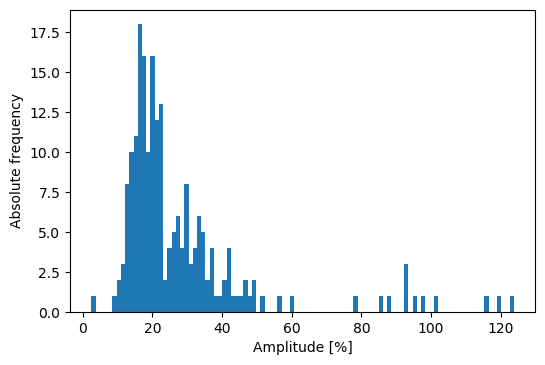

In [8]:
fig, ax = plt.subplots(1, dpi = 100)
_ = ax.hist(height, bins = 100)
ax.set_xlabel("Amplitude [%]")
ax.set_ylabel("Absolute frequency")

In [9]:
components = [dataset["sws"][id]["flow_components"]["per_wave"]["left_hemisphere"] for id in np.array(slow_wave_ids)[where]]
components = np.array(components)
relative_components = np.array([normalize(c) for c in components])
vertical_greater_horizontal = np.array([normalize(c) for c in components[:,1:3]])

In [10]:
abs_up_flow = np.abs(components[:,2])
abs_down_flow = np.abs(components[:,3])
abs_left_flow = np.abs(components[:,0])
abs_right_flow = np.abs(components[:,1])

ud = abs_up_flow + abs_down_flow
lr = abs_right_flow + abs_left_flow
up_flow = abs_up_flow/ud#upwards flow as fraction of total upwards/downwards flow
left_flow = abs_left_flow/lr#upwards flow as fraction of total upwards/downwards flow

flow_per_auc = (ud+lr)/[np.nansum(x) for x in gcamp_mean]

ratio_vertical_horizontal = ud/(ud+lr)

In [11]:
total_flow = (abs_left_flow+abs_right_flow+abs_up_flow+abs_down_flow)
leftwards_by_tot = (abs_left_flow)/total_flow
rightwards_by_tot = (abs_right_flow)/total_flow
upwards_by_tot = (abs_up_flow)/total_flow
downwards_by_tot = (abs_down_flow)/total_flow

flow_by_tot = [leftwards_by_tot, rightwards_by_tot, upwards_by_tot, downwards_by_tot]

In [12]:
components[0]

array([0.0028429 , 0.00197521, 0.00017828, 0.00095401], dtype=float32)

In [13]:
import pandas as pd
crosscorr = np.corrcoef([leftwards_by_tot, rightwards_by_tot, upwards_by_tot, downwards_by_tot])
df = pd.DataFrame(crosscorr, columns = ["Left","right", "up", "down"])
df.insert(0, column = "", value = ["Left","right", "up", "down"])
df

,,Left,right,up,down
0,Left,1.000000,0.604078,-0.069588,-0.749162
1,right,0.604078,1.000000,-0.075030,-0.740856
2,up,-0.069588,-0.075030,1.000000,-0.485936
3,down,-0.749162,-0.740856,-0.485936,1.000000


In [14]:
components = (components.T / np.max(components, axis = 1)).T

In [15]:
#abs_up_flow - abs_down_flow

In [16]:
#for uf in [up_flow[iso == i] for i in list(set(isos))]:
#    plt.scatter(np.arange(len(uf)), uf)
#    plt.plot([0,60], [np.mean(uf), np.mean(uf)])

## Prepare data

Use train test split to split the dataset. 

Append features that we aim to plot later such that they are split and shuffled in the same way.

In [17]:
from sklearn.model_selection import train_test_split
random_state = 42
test_size=.25

In [18]:
values = np.hstack([np.array([width]).T, np.array([height]).T])

In [19]:
sources_sinks_train, sources_sinks_test = train_test_split(sources_sinks, test_size=test_size, random_state = random_state)
vectors_train, vectors_test = train_test_split(gcamp, test_size=test_size, random_state = random_state)
values_train, values_test = train_test_split(values, test_size=test_size, random_state = random_state)

values_train = normalize(values_train)

sources_sinks_train =  np.expand_dims(sources_sinks_train,-1)
sources_sinks_test =  np.expand_dims(sources_sinks_test,-1)
vectors_train = np.expand_dims(vectors_train,-1)
vectors_test = np.expand_dims(vectors_test, -1)

vectors_train = np.expand_dims(vectors_train,1)
vectors_test = np.expand_dims(vectors_test, -1)

Save additional features as variables.

In [20]:
additional_features = [iso, corr, width, height, ratio_vertical_horizontal, up_flow, left_flow, flow_per_auc]
additional_features = [train_test_split(f, test_size=test_size, random_state = random_state) for f in additional_features]
add_train = [f[0] for f in additional_features]
add_test = [f[1] for f in additional_features]
iso_train, corr_train, width_train, height_train, ratio_vertical_horizontal_train, up_flow_train, left_flow_train, flow_per_auc_train = add_train
iso_test, corr_test, width_test, height_test, ratio_vertical_horizontal_test, up_flow_test, left_flow_test, flow_per_auc_test = add_test

In [21]:
print("There are " + str(len(iso_test)) + " test samples")

There are 52 test samples


In [22]:
print("The maximal amplitude of the percentage change in time is " 
              + str(np.max(height_train).round()))

The maximal amplitude of the percentage change in time is 124.0


# Variational Autoenconder

In [23]:
## network parameters
from predictive_modeling.models.vae_cnn_v1 import *
from keras import Model

batch_size = 100
epochs = 200

n_values = 2

In [24]:
[image_input, value_input, vector_input], [z_mean, z_log_var, z] = encoder(n_values)
latent_inputs, [image_decoded, values_decoded, vector_decoded] = decoder(n_values)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


../../predictive_modeling/models/vae_cnn_v1.py:113: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (8, 8), input_shape=[64, 128, ..., activation="relu", strides=(4, 4))`
  image_model.add(Conv2D(32, (8, 8), subsample=(4, 4), input_shape=[64, 128,1], activation = "relu"))
../../predictive_modeling/models/vae_cnn_v1.py:114: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), activation="relu", strides=(2, 2))`
  image_model.add(Conv2D(64, (4, 4), subsample=(2, 2), activation = "relu"))
../../predictive_modeling/models/vae_cnn_v1.py:115: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", strides=(1, 1))`
  image_model.add(Conv2D(64, (3, 3), subsample=(1, 1), activation = "relu"))


(None, 1, 128, 1)


In [25]:
encoder_model = Model(inputs = [image_input, value_input, vector_input], outputs = [z_mean, z_log_var, z])
decoder_model = Model(inputs = latent_inputs, outputs = [image_decoded, values_decoded, vector_decoded], name='decoder')

In [26]:
image_decoded, values_decoded, vector_decoded = decoder_model(encoder_model([image_input, value_input, vector_input])[2])

In [27]:
vae = Model(inputs = [image_input, value_input, vector_input], 
            outputs = [image_decoded, values_decoded, vector_decoded], name='vae_mlp')

In [28]:
print("The input shapes of the autoencoder are: ")
print(image_input.shape)
print(value_input.shape)
print(vector_input.shape)

The input shapes of the autoencoder are: 
(None, 64, 128, 1)
(None, 2)
(None, 1, 128, 1)


In [29]:
import keras
loss, loss_width_height, loss_signal_in_time, img_reconstruction_loss = get_vae_loss(image_input, value_input, vector_input, image_decoded, values_decoded, vector_decoded, z_mean, z_log_var, impact_reconstruction_loss = 1000)
vae.add_loss(loss)
vae.add_metric(loss_width_height, name='loss_width_height')
#vae.add_metric(loss_direction, name='loss_direction')
vae.add_metric(loss_signal_in_time, name='loss_signal_in_time')
vae.add_metric(img_reconstruction_loss, name='img_reconstruction_loss')

#vae.compile(optimizer= keras.optimizers.Adam(learning_rate=0.01))
vae.compile(optimizer = "adam")

/home/elerator/anaconda3/lib/python3.7/site-packages/keras/engine/training_utils.py:819: UserWarning: Output decoder missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to decoder.
  'be expecting any data to be passed to {0}.'.format(name))


In [30]:
x_train_combined = [sources_sinks_train, values_train, vectors_train]

In [ ]:
# train the autoencoder
history = vae.fit(x_train_combined, validation_data = (x_train_combined, None), epochs= 1000, batch_size=batch_size, verbose=2)

Train on 153 samples, validate on 153 samples
Epoch 1/1000
 - 1s - loss: 594.4341 - loss_width_height: 0.0016 - loss_signal_in_time: 0.0331 - img_reconstruction_loss: 0.0311 - val_loss: 591.1682 - val_loss_width_height: 0.0015 - val_loss_signal_in_time: 0.0328 - val_img_reconstruction_loss: 0.0311
Epoch 2/1000
 - 2s - loss: 589.2977 - loss_width_height: 0.0014 - loss_signal_in_time: 0.0336 - img_reconstruction_loss: 0.0308 - val_loss: 586.3791 - val_loss_width_height: 0.0014 - val_loss_signal_in_time: 0.0325 - val_img_reconstruction_loss: 0.0311
Epoch 3/1000
 - 1s - loss: 586.4072 - loss_width_height: 0.0016 - loss_signal_in_time: 0.0325 - img_reconstruction_loss: 0.0316 - val_loss: 584.5176 - val_loss_width_height: 0.0014 - val_loss_signal_in_time: 0.0324 - val_img_reconstruction_loss: 0.0311
Epoch 4/1000
 - 1s - loss: 582.7655 - loss_width_height: 0.0015 - loss_signal_in_time: 0.0329 - img_reconstruction_loss: 0.0308 - val_loss: 582.7127 - val_loss_width_height: 0.0015 - val_loss_sig

Epoch 34/1000
 - 1s - loss: 517.7615 - loss_width_height: 0.0014 - loss_signal_in_time: 0.0291 - img_reconstruction_loss: 0.0306 - val_loss: 515.2587 - val_loss_width_height: 0.0011 - val_loss_signal_in_time: 0.0283 - val_img_reconstruction_loss: 0.0300
Epoch 35/1000
 - 1s - loss: 515.8401 - loss_width_height: 0.0013 - loss_signal_in_time: 0.0281 - img_reconstruction_loss: 0.0306 - val_loss: 512.1513 - val_loss_width_height: 0.0011 - val_loss_signal_in_time: 0.0282 - val_img_reconstruction_loss: 0.0300
Epoch 36/1000
 - 1s - loss: 511.9897 - loss_width_height: 0.0011 - loss_signal_in_time: 0.0287 - img_reconstruction_loss: 0.0302 - val_loss: 504.6392 - val_loss_width_height: 0.0010 - val_loss_signal_in_time: 0.0278 - val_img_reconstruction_loss: 0.0299
Epoch 37/1000
 - 1s - loss: 503.7068 - loss_width_height: 0.0012 - loss_signal_in_time: 0.0286 - img_reconstruction_loss: 0.0307 - val_loss: 500.4436 - val_loss_width_height: 0.0014 - val_loss_signal_in_time: 0.0273 - val_img_reconstructi

Epoch 67/1000
 - 2s - loss: 452.8406 - loss_width_height: 9.5355e-04 - loss_signal_in_time: 0.0257 - img_reconstruction_loss: 0.0298 - val_loss: 451.8623 - val_loss_width_height: 8.5840e-04 - val_loss_signal_in_time: 0.0246 - val_img_reconstruction_loss: 0.0290
Epoch 68/1000
 - 1s - loss: 452.4809 - loss_width_height: 9.3061e-04 - loss_signal_in_time: 0.0246 - img_reconstruction_loss: 0.0290 - val_loss: 451.2782 - val_loss_width_height: 8.4794e-04 - val_loss_signal_in_time: 0.0246 - val_img_reconstruction_loss: 0.0292
Epoch 69/1000
 - 1s - loss: 451.3084 - loss_width_height: 9.9593e-04 - loss_signal_in_time: 0.0248 - img_reconstruction_loss: 0.0297 - val_loss: 450.9094 - val_loss_width_height: 8.7254e-04 - val_loss_signal_in_time: 0.0246 - val_img_reconstruction_loss: 0.0289
Epoch 70/1000
 - 1s - loss: 451.8629 - loss_width_height: 9.6052e-04 - loss_signal_in_time: 0.0250 - img_reconstruction_loss: 0.0298 - val_loss: 450.1702 - val_loss_width_height: 8.3290e-04 - val_loss_signal_in_tim

Epoch 99/1000
 - 1s - loss: 446.3394 - loss_width_height: 0.0013 - loss_signal_in_time: 0.0254 - img_reconstruction_loss: 0.0288 - val_loss: 445.7008 - val_loss_width_height: 0.0011 - val_loss_signal_in_time: 0.0242 - val_img_reconstruction_loss: 0.0283
Epoch 100/1000
 - 1s - loss: 445.7273 - loss_width_height: 0.0013 - loss_signal_in_time: 0.0251 - img_reconstruction_loss: 0.0284 - val_loss: 443.3316 - val_loss_width_height: 0.0012 - val_loss_signal_in_time: 0.0240 - val_img_reconstruction_loss: 0.0283
Epoch 101/1000
 - 1s - loss: 442.5046 - loss_width_height: 0.0012 - loss_signal_in_time: 0.0246 - img_reconstruction_loss: 0.0283 - val_loss: 440.8376 - val_loss_width_height: 0.0011 - val_loss_signal_in_time: 0.0239 - val_img_reconstruction_loss: 0.0282
Epoch 102/1000
 - 1s - loss: 442.7216 - loss_width_height: 0.0010 - loss_signal_in_time: 0.0244 - img_reconstruction_loss: 0.0287 - val_loss: 441.8429 - val_loss_width_height: 0.0011 - val_loss_signal_in_time: 0.0240 - val_img_reconstru

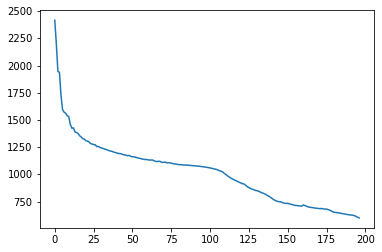

In [32]:
plt.plot(vae.history.history["val_loss"][10:])

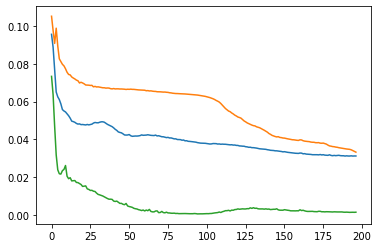

In [33]:
plt.plot(vae.history.history["val_img_reconstruction_loss"][10:])
plt.plot(vae.history.history["val_loss_signal_in_time"][10:])
plt.plot(vae.history.history["val_loss_width_height"][10:])
#plt.plot(vae.history.history["val_loss_direction"][10:])

# Visualize predictions

In [34]:
res = vae.predict(x_train_combined)

In [35]:
val_predictions = res[1]

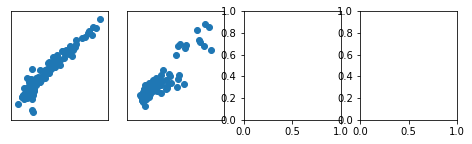

In [36]:
fig, ax = plt.subplots(1,4, figsize = (8,2))
for x in range(2):
    ax[x].scatter(val_predictions[:,0+x], values_train[:,0+x])
    ax[x].set_xticks([])
    ax[x].set_yticks([])

In [37]:
from scipy.ndimage import median_filter

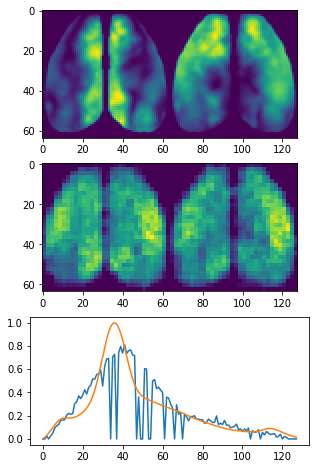

In [38]:
i = 3
fig, ax = plt.subplots(3, figsize= (5,8))
ax[0].imshow(sources_sinks_train[i][:,:,0])
ax[1].imshow(res[0][i][:,:,0])

ax[2].plot(res[2][i][0,:128,0])
ax[2].plot(vectors_train[i][0,:128,0])

In [46]:
from plots import manifold
from plots import manifold_of_images

In [47]:
#Predictions for z[0] and z[1] neurons i.e. x and y for the train and test datasets 
x_pred_train, y_pred_train = encoder_model.predict([np.array(sources_sinks_train1), x_train])[2].T

In [48]:
%%capture
x_min = np.mean(x_pred_train)-2*np.std(x_pred_train)
y_min = np.mean(y_pred_train)-2*np.std(y_pred_train)
x_max = np.mean(x_pred_train)+2*np.std(x_pred_train)
y_max = np.mean(y_pred_train)+2*np.std(y_pred_train)
x_range = [x_min, x_max]
y_range = [y_min, y_max]

man_mean_signal = manifold(decoder_model, x_range, y_range, n = 15, dpi = 300, scale="sqrt", pos_in_multi_output = 1, medfilt = 8)

In [56]:
import random
def manifold_of_vector_components(figsize=(5,5), dpi = 200, n = 15, decoder_model = None, x_range = [0,1], y_range = [0, 1], cmap = "inferno", debug = False):
    udlr = np.ndarray(shape = (n,n), dtype = np.ndarray)
    if decoder_model:
        for y_pos, y in enumerate(np.linspace(y_range[0], y_range[1], n)):
            for x_pos, x in enumerate(np.linspace(x_range[0], x_range[1], n)):
                udlr[y_pos,x_pos] = np.array(decoder_model.predict([[[y,x]]])[1][0][130:134])
        
    fig, ax = plt.subplots(n, n, figsize= figsize, dpi = dpi)
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, top=1, bottom=0)

    for y in range(n):
        for x in range(n):
            if debug:
                ax[y,x].imshow(render_arrow_components(random.uniform(0,1) ,random.uniform(0,1), random.uniform(0,1) ,random.uniform(0,1) ))
            else:
                ax[y,x].imshow(render_arrow_components(udlr[y,x][0], udlr[y,x][1], udlr[y,x][2], udlr[y,x][3], cmap = cmap))
                ax[y,x].set_facecolor('black')

            ax[y,x].axis("off")
    return fig2rgb_array(fig)

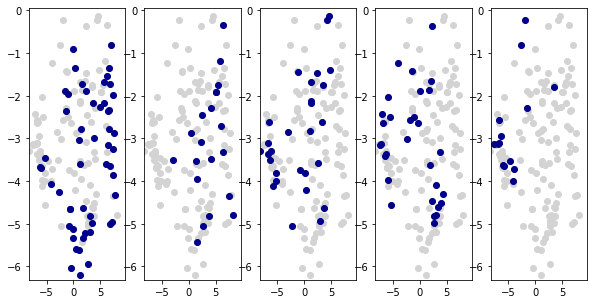

In [53]:
z_train = encoder_model.predict([np.array(sources_sinks_train1), x_train])[2].T

fig, ax = plt.subplots(1,5, figsize= (10,5))
isos = [1.8, 2.0, 2.2, 2.4, 2.6]

def add_feature_plot(ax, iso):
    ax.scatter(*z_train, c= "lightgray")
    ax.scatter(*(z_train.T[iso_train == iso]).T, c = "darkblue")

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

for iso, a in zip(isos,ax):
    add_feature_plot(a, iso)

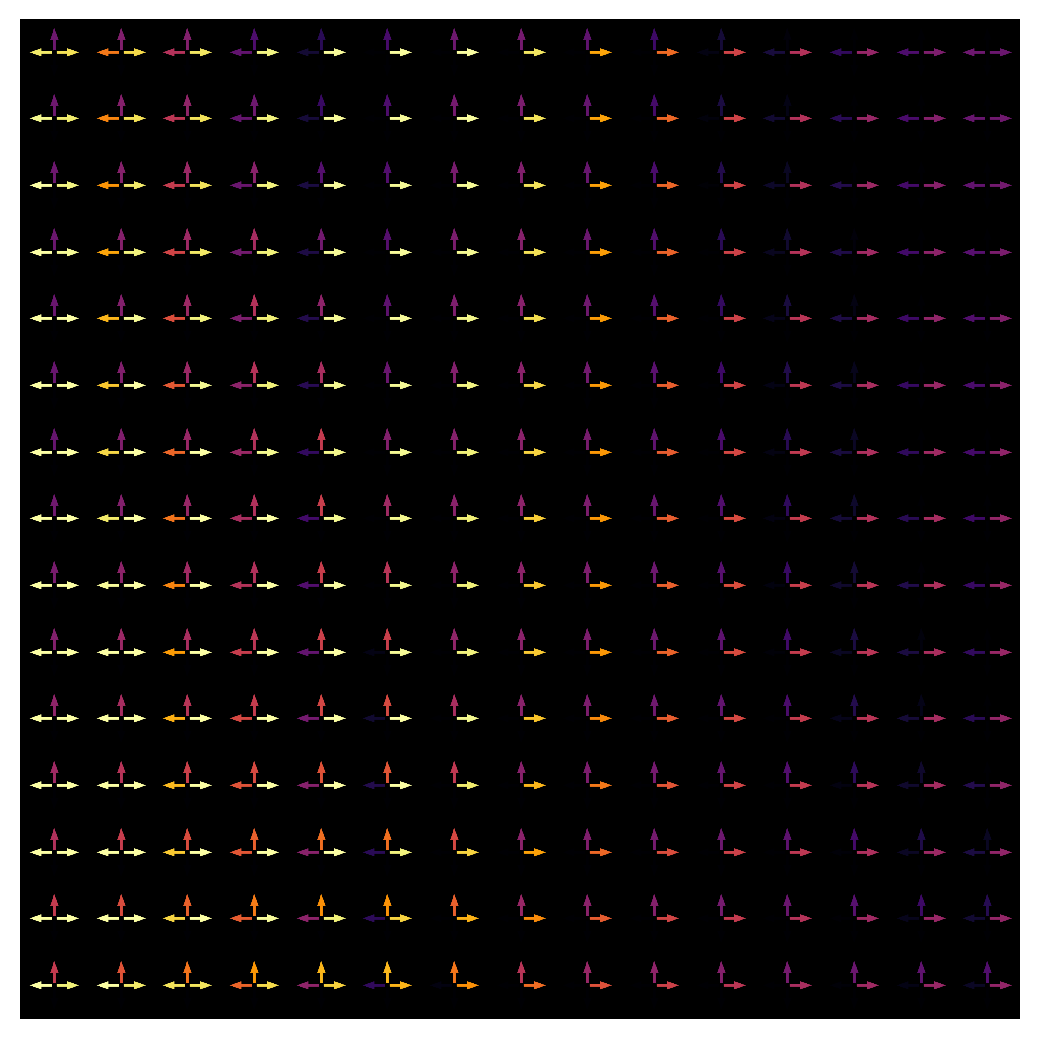

In [57]:
#%%capture
manifold_vector_components = manifold_of_vector_components(x_range = x_range, y_range = y_range, decoder_model = decoder_model)

In [59]:
sources_manifold = manifold_of_images(decoder_model, x_range, y_range, sources_sinks = "sources")
sinks_manifold = manifold_of_images(decoder_model, x_range, y_range, sources_sinks = "sinks")

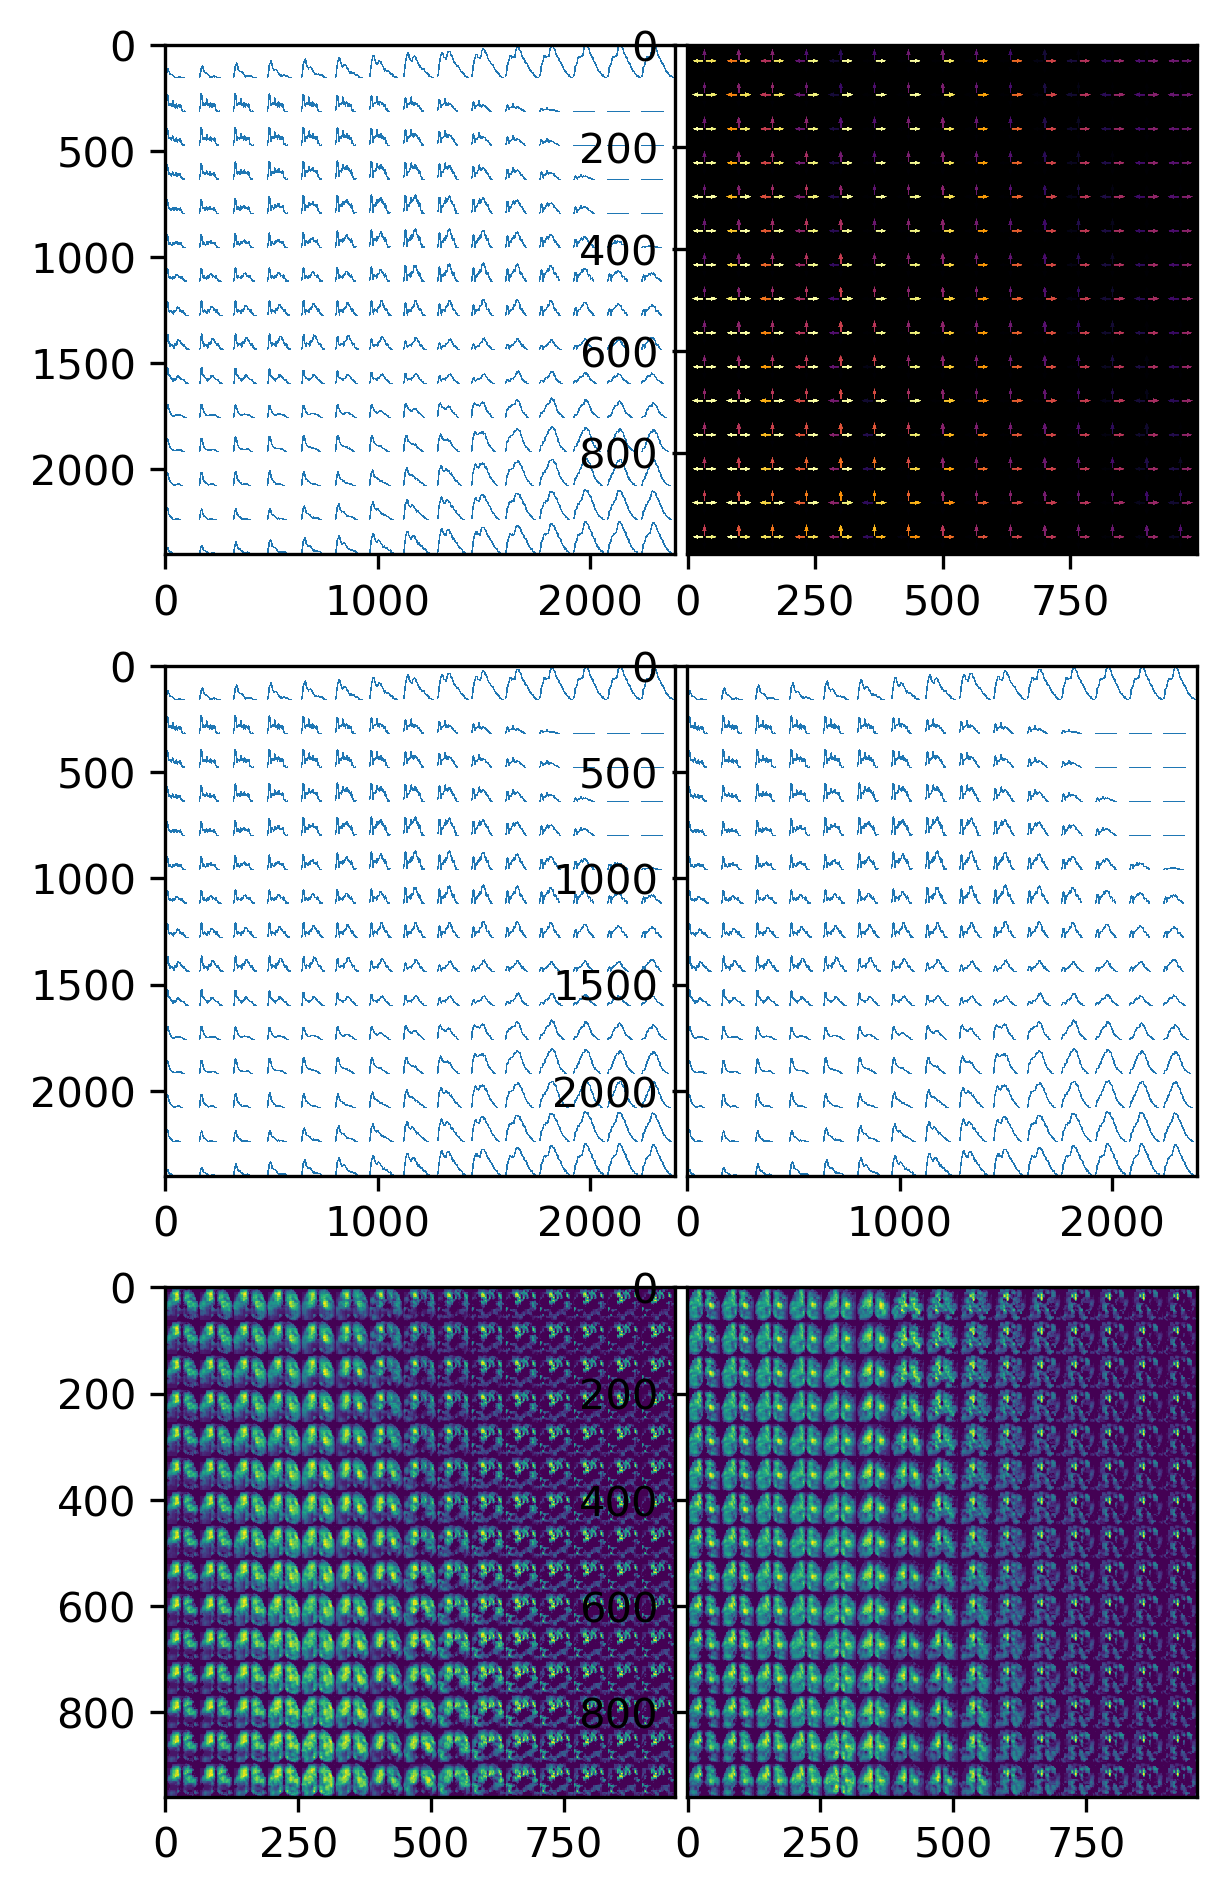

In [60]:
fig = plt.figure(constrained_layout = False, figsize = (8,8), dpi = 300)
gs1 = fig.add_gridspec(nrows = 6, ncols = 4, left=0.05, right=0.48, wspace=0.05)
ax0 = fig.add_subplot(gs1[0:2, 0:2])
ax1 = fig.add_subplot(gs1[0:2, 2:4])
ax2 = fig.add_subplot(gs1[2:4, 0:2])
ax3 = fig.add_subplot(gs1[2:4, 2:4])
ax4 = fig.add_subplot(gs1[4:6, 0:2])
ax5 = fig.add_subplot(gs1[4:6, 2:4])

ax0.imshow(man_mean_signal)
ax1.imshow(manifold_vector_components)
ax2.imshow(man_mean_signal)
ax3.imshow(man_mean_signal)
ax4.imshow(sources_manifold)
ax5.imshow(sinks_manifold)

In [65]:
x_train.shape

(153, 130)

# Visualization

In [36]:
vae.save("full_vae")

In [41]:
vae = keras.models.load_model("full_vae", custom_objects={'tf': tf}, compile = False)